# Embedding space

This document will explore the training and analysis of our embedding space.

In [ ]:
%pip install scipy==1.10.0
%pip install gensim
%pip install numpy
%pip install pandas
%pip install scikit-learn
%pip install matplotlib
%pip install pacmap
%pip install plotly
%pip install nbformat

In [6]:
import csv
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import json
from collections import defaultdict
import re


In [7]:
with open('../Data/sequences.csv', 'r') as f:
    reader = csv.reader(f)
    sequences = list(reader)

# First model

In [ ]:
model = Word2Vec(sentences=sequences,   # This is the data that we wish to create notes on. This will take all unique words (stations) and put them in the NN
                 vector_size=300,       # Amount of dimension
                 min_count=10,          # If the number of occurences of this station is less than 10, then we are not interested in having it in our embedding. -- THIS NEED TO BE LOOKED AT
                 workers=4              # Amount of cores used for training and so forth.
                 )         

model.build_vocab(sequences)
model.train(sequences, total_examples=model.corpus_count, epochs=1)


In [ ]:
model.wv.vectors

# Vanløse test case

In [19]:

from collections import Counter

# Initialize a Counter to store station counts
station_counter = Counter()
list_of_stations_with_vanløse = []

# Iterate over each journey list
for journey in sequences:
    # Check if 'Vanløse St.' is present in the journey
    if 'Vanløse St.' in journey:
        # Iterate over each station in the journey
        for station in journey:
            # Exclude 'Vanløse St.' from counting
            if station != 'Vanløse St.':
                # Increment the count for the station
                station_counter[station] += 1

# Sort the station counts by count (descending order)
sorted_stations = sorted(station_counter.items(), key=lambda x: x[1], reverse=True)
for sta in sorted_stations:
    if sta[1] > 7:
        list_of_stations_with_vanløse.append(sta[0])

# Print the station counts
for station, count in sorted_stations:
    print(f"{station}: {count}")


Nørreport St.: 3846
Kongens Nytorv St. (Metro): 2482
CPH Lufthavn: 2445
København H: 1972
Amagerbro St. (Metro): 942
København H (Metro): 929
Dybbølsbro St.: 902
Nørreport St. (Metro): 809
Forum St. (Metro): 720
Christianshavn St. (Metro): 644
Carlsberg St.: 601
Islands Brygge St. (Metro): 533
Lergravsparken St. (Metro): 524
Christianshavn St.: 522
Ørestad St.: 509
Bella Center St. (Metro): 473
Rådhuspladsen St. (Metro): 454
Vestamager St. (Metro): 440
Vesterport St.: 434
Nordhavn St.: 363
Forum St.: 347
Ørestad St. (Metro): 303
Kongens Nytorv: 300
Trianglen St. (Metro): 285
Kastrup St. (Metro): 284
Kongens Nytorv St.: 278
Amager Strand St. (Metro): 261
Østerport St.: 249
Femøren St. (Metro): 248
Enghave Plads St.: 226
Islands Brygge St.: 218
Øresund St. (Metro): 198
Gammel Strand St. (Metro): 187
Nørre Farimagsgade: 184
Rådhuspladsen: 169
Enghave Plads St. (Metro): 153
Frederiksberg Allé St. (Metro): 148
Amagerbro St.: 128
Marmorkirken St. (Metro): 128
Vestamager St.: 124
Sundby St. (

In [ ]:
list_of_stations_with_vanløse

In [ ]:
from matplotlib import pyplot as plt


def tsne_plot(model):
    "Create TSNE model and plot it"
    labels = []
    tokens = []

    for word in model.wv.index_to_key:
        tokens.append(model.wv[word])
        if(word) in list_of_stations_with_vanløse:
            labels.append(word)
        else:
            labels.append(None)
       
    tsne_model = TSNE(perplexity=5, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(18, 18)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        
        plt.annotate(labels[i],
                    xy=(x[i], y[i]),
                    xytext=(5, 2),
                    textcoords='offset points',
                    ha='right',
                    va='bottom')
    plt.show()
   
tsne_plot(model)

# København H (Metro) Test

In [17]:

from collections import Counter

# Initialize a Counter to store station counts
station_counter_kbh_metro = Counter()
list_of_stations_with_kbh_metro = []

# Iterate over each journey list
for journey in sequences:
    if 'København H (Metro)' in journey:
        # Iterate over each station in the journey
        for station in journey:
            if station != 'København H (Metro)':
                station_counter_kbh_metro[station] += 1

# Sort the station counts by count (descending order)
sorted_stations_kbh = sorted(station_counter_kbh_metro.items(), key=lambda x: x[1], reverse=True)
for sta in sorted_stations_kbh:
    if sta[1] > 7:
        list_of_stations_with_kbh_metro.append(sta[0])

# Print the station counts
for station, count in sorted_stations_kbh:
    print(f"{station}: {count}")


Kongens Nytorv St. (Metro): 10523
Trianglen St. (Metro): 5142
Nørrebro St.: 4638
Marmorkirken St. (Metro): 4575
Frederiksberg St. (Metro): 3636
Gammel Strand St. (Metro): 2880
Nørreport St.: 2758
Skjolds Plads St. (Metro): 2729
Valby St.: 2507
Nørrebros Runddel St. (Metro): 2470
Poul Henningsens Plads St. (Metro): 2148
Ørestad St.: 2147
Nuuks Plads St. (Metro): 2118
Orientkaj St. (Metro): 2043
Nordhavn St.: 1973
Christianshavn St. (Metro): 1956
Enghave Plads St. (Metro): 1912
Østerport St.: 1893
CPH Lufthavn: 1836
Nordhavn St. (Metro): 1808
Aksel Møllers Have St. (Metro): 1667
Sydhavn St.: 1658
Frederiksberg Allé St. (Metro): 1647
Nørrebro St. (Metro): 1547
Bella Center St. (Metro): 1535
Vibenshus Runddel St. (Metro): 1473
Lergravsparken St. (Metro): 1468
Ørestad St. (Metro): 1354
Hellerup St.: 1350
Østerport St. (Metro): 1307
Vestamager St. (Metro): 1267
Ny Ellebjerg St.: 1131
Amagerbro St. (Metro): 993
Rådhuspladsen: 937
Vanløse St.: 929
DR Byen St. (Metro) (01/03): 887
Islands Brygg

In [ ]:
list_of_stations_with_kbh_metro

In [ ]:
def tsne_plot(model):
    "Create TSNE model and plot it"
    labels = []
    tokens = []

    for word in model.wv.index_to_key:
        tokens.append(model.wv[word])
        if(word) in list_of_stations_with_kbh_metro:
            labels.append(word)
        else:
            labels.append(None)
       
    tsne_model = TSNE(perplexity=5, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(18, 18)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        
        plt.annotate(labels[i],
                    xy=(x[i], y[i]),
                    xytext=(5, 2),
                    textcoords='offset points',
                    ha='right',
                    va='bottom')
    plt.show()
   
tsne_plot(model)

# General

Reference: ```https://towardsdatascience.com/visualizing-your-embeddings-4c79332581a9```
#### Embedding space

***Mathematical intuition***: Given two points Xi, Xj, the farther they are, the higher their distance dj|i, the higher their dissimilarity, and the lower the probability that they will consider each other neighbors.

***Key concept***: the further away two embeddings are in the space, the more dissimilar they are.

#### Perplexity
***Mathematical intuition***: The higher the perplexity, the more likely it is to consider points that are far away as neighbors.

***Advice***: The authors of SNE and t-SNE (yes, t-SNE has perplexity as well) use perplexity values between five and 50.

In [ ]:
def tsne_plot(model):
    "Create TSNE model and plot it"
    labels = []
    tokens = []

    for word in model_new.wv.index_to_key:
        tokens.append(model_new.wv[word])
        if(word) in list_of_stations_with_kbh_metro:
            labels.append(word)
        else:
            labels.append(None)
       
    tsne_model = TSNE(perplexity=50, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(18, 18)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        
        plt.annotate(labels[i],
                    xy=(x[i], y[i]),
                    xytext=(5, 2),
                    textcoords='offset points',
                    ha='right',
                    va='bottom')
    plt.show()
   
tsne_plot(model_new)

# Visualizing with model of all journeys cph trained 5000 times

In [8]:
model_5000 = Word2Vec.load("../Data/Models/word2vec_epoch_5000.model")
model_200 = Word2Vec.load("../Data/Models/word2vec_epoch_200_min_1.model")
model_1000 = Word2Vec.load("../Data/Models/word2vec_epoch_1000_min_1.model")
model_3000 = Word2Vec.load("../Data/Models/word2vec_epoch_3000_min_1.model")

# T-SNE plot first

# Testing using PaCMAP


In [9]:
%pip install pacmap

Note: you may need to restart the kernel to use updated packages.


In [ ]:
def tsne_plot(model):
    "Create TSNE model and plot it"
    labels = []
    tokens = []

    for word in model.wv.index_to_key:
        tokens.append(model.wv[word])
        #labels.append(word)
       
    tsne_model = TSNE(perplexity=50, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(18, 18)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        
        # plt.annotate(labels[i],
        #             xy=(x[i], y[i]),
        #             xytext=(5, 2),
        #             textcoords='offset points',
        #             ha='right',
        #             va='bottom')
    plt.show()
   
tsne_plot(model_all)

## paCMAP

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pacmap

# Assuming model_new is your Word2Vec model
station_names = model_all.wv.index_to_key

# Generate labels based on whether "metro" is in the station name
labels = []
for station_name in station_names:
    if "metro" in station_name.lower():
        labels.append("Metro")
    else:
        labels.append("Non-Metro")

# Convert labels to numerical format
label_encoder = LabelEncoder()
label_encoder.fit(labels)
numeric_labels = label_encoder.transform(labels)

# Convert Word2Vec vectors to numpy array
X = model_all.wv.vectors

# Initializing the PaCMAP instance
embedding = pacmap.PaCMAP(n_components=2, n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0) 

# Fit the data
X_transformed = embedding.fit_transform(X, init="pca")

# Visualize the embedding with different colors for "Metro" and "Non-Metro" stations
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
scatter = ax.scatter(X_transformed[:, 0], X_transformed[:, 1], c=numeric_labels, cmap='coolwarm', s=0.6)
plt.colorbar(scatter, ax=ax)

plt.show()


## T-SNE

In [ ]:
def tsne_plot(model):
    "Create TSNE model and plot it"
    labels = []
    tokens = []

    for word in model.wv.index_to_key:
        tokens.append(model.wv[word])
        #labels.append(word)
       
    tsne_model = TSNE(perplexity=50, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(18, 18)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        
        # plt.annotate(labels[i],
        #             xy=(x[i], y[i]),
        #             xytext=(5, 2),
        #             textcoords='offset points',
        #             ha='right',
        #             va='bottom')
    plt.show()
   
tsne_plot(model_all)

# Training a model

Trying set min-count to 1, because we have more than 15.000 sequences where one of the stations is mentioned under 10 times in total. 

In [35]:
model = Word2Vec(sentences=sequences,   # This is the data that we wish to create notes on. This will take all unique words (stations) and put them in the NN
                 vector_size=300,       # Amount of dimension
                 min_count=1,          
                 workers=4              # Amount of cores used for training and so forth.
                 )         

model.build_vocab(sequences)
model.train(sequences, total_examples=model.corpus_count, epochs=3000)

(11464244234, 20815842000)

In [37]:
model.save("word2vec_epoch_3000_min_1.model")


In [10]:
f = open('../Data/data.json')
data = json.load(f)

a = open('../Data/added_data.json')
added_data = json.load(a)

# Prep for labels zipcodes

In [11]:
#retrieve zipcode
def getZip(info):
    pattern = '\d{4}'
    match = re.search(pattern, info)
    if match is not None:
        return match.group()
    else :
        return

# # Extract zip codes and corresponding coordinates
#zip_coordinates = defaultdict(list)
address_coordinates = {}
wrong_addresses = []
# we have some json objects where the address exists but the info is null. This happens in 1602 cases (assume this is where the geolocator failed)
for address, info in data.items():
    if info is not None: 
        zip_code = getZip(info['address'])  # Extract zip code from address could be empty
        if zip_code is not None:
            if 1000 <= int(zip_code) < 4999: #for now removing all failed zipcodes in Jylland
                 #zip_coordinates[zip_code].append((address,info["latitude"], info["longitude"]))
                 address_coordinates[address] = zip_code
            else: 
                wrong_addresses.append(address) #go through later
        else:
            address_coordinates[address] = 0000 #no zipcode was found
    else:
        address_coordinates[address] = 0000 #no info was found on the address?

#run through the list of wrong addresses and try to find them in the added_data.json file to get the "correct" zipcode
for address in wrong_addresses:
    #find in json file
    if address in added_data:
        zip = getZip(added_data[address]['address'])
        address_coordinates[address] = zip

for address, zip_code in address_coordinates.items():
    print(address)
    print(zip_code)
    print()

print(len(address_coordinates))

Otto Mallings Gade 8
2100

Borgbjergsvej 56
2450

Nørre Farimagsgade 64A
1364

Nyrnberggade 38
2300

Dag Hammarskjölds Allé 32
2100

Vigerslev Allé 71
2500

Arkonagade 19
1726

Lyongade 9
2300

Bachersmindevej 5B
2791

Thingvalla Allé 25
2300

Ungarnsgade 4
2300

Maglestien 20
2860

Bag Elefanterne 15
1799

Alsgade 8
1764

Tomsgårdsvej 23C
2400

Wilkensvej 8
2000

Tåsingegade 20
2100

Korsgade 38
2200

Belfastvej 13B
2300

Alliancevej
2450

Kyringevej 1
2700

Hvidkildevej 36B
2400

Gammel Køge Landevej 132
2500

Nørrebrogade 210
2200

Amagerbrogade 289
2300

Leiden Alle 15
2791

Blegdamsvej 132A
2100

Langelandsvej 10A
2000

Burmeistersgade 1C
1429

Bryggernes Plads 9A
1799

Scandiagade 58
2450

Halmtorvet 29E
1700

Helsinkigade 5
2150

Gåsebæksvej 12
2500

Nadine Gordimers Vej 11
2300

Baggesensgade 39
2200

Pilegård Alle 3
2770

I C Lembrechts Alle 13
2650

Ingrid Marievej 1
2500

Tilburg Alle 46
2791

Kastrupvej 102
4370

Raffinaderivej 2300 København S
0

Sundby St.
0

Lindevej 25


#### Prep for labels count

in 1602 cases for the json file the info is null

In [36]:
address_count_seq = {}
for seq in sequences:
    for place in seq:
        if place in address_count_seq:
            address_count_seq[place] += 1
        else:
            address_count_seq[place] = 1

address_count_seq

{'København H': 561105,
 'Borrebyvej 29': 2,
 'Hulgårds Plads': 6721,
 'Islands Brygge St. (Metro)': 68363,
 'København H (Metro)': 115016,
 'Frederiksberg Allé St. (Metro)': 40895,
 'Nørreport St.': 342289,
 'Sluseholmen': 8055,
 'Lufthavnen St. (Metro)': 37354,
 'Aksel Møllers Have St. (Metro)': 17669,
 'CPH Lufthavn': 360454,
 'Istedgade 6': 77,
 'Ryumgårdsvej': 413,
 'Dybbølsbro St.': 62202,
 'Teglgårdstræde': 6498,
 'Kapelvej': 18689,
 'Forum St. (Metro)': 69195,
 'Drechselsgade': 4402,
 'Nyhavn': 79750,
 'Refshaleøen': 189228,
 'Nørre Campus': 4827,
 'Dronningens Tværgade 37': 5,
 'Elmegade': 41246,
 'Værnedamsvej': 6845,
 'Skellet': 297,
 'Vestamager St. (Metro)': 77945,
 'Fisketorvet': 16649,
 'Sjælør St.': 9632,
 'Østerport St.': 75800,
 'Orientkaj St.': 20295,
 'Sønderport': 7334,
 'Rådhuspladsen St. (Metro)': 63028,
 'Vesterport St.': 49705,
 'Nordhavn St.': 66577,
 'Terminalvej': 276,
 'Hellerup St.': 36758,
 'Polititorvet': 42351,
 'Amager Boulevard': 2745,
 'Nordre Toldbo

## Plotting

Now that we have a dictionary mapping all addresses to their zipcode, we want to try to plot this using the different dimension reduction algorithms

Count the number of objects in the json file to see why we only have 34815
If the last section works, the below can be deleted

# FUNCTION TO CREATE PLOTS

In [12]:
def create_plot(input_model, label_function, name_of_plot):
    #get station names from the model
    model = input_model
    station_names = model.wv.index_to_key

    # Generate labels based on labels function
    labels = label_function([], station_names)
    
    # Convert labels to numerical format
    label_encoder = LabelEncoder()
    label_encoder.fit(labels)
    numeric_labels = label_encoder.transform(labels)

    # Convert Word2Vec vectors to numpy array
    X = model.wv.vectors

    # Initializing the PaCMAP instance
    embedding = pacmap.PaCMAP(n_components=2, n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0) 

    # Fit the data
    X_transformed = embedding.fit_transform(X, init="pca")

    fig, ax = plt.subplots(1, 1, figsize=(20, 20))
    scatter = ax.scatter(X_transformed[:, 0], X_transformed[:, 1], c=numeric_labels, cmap='coolwarm', s=0.6)
    plt.colorbar(scatter, ax=ax)
    plt.savefig(name_of_plot)
    plt.show()



Experimenting with plots in 3d

In [48]:
import plotly.graph_objects as go
import plotly.io as pio

def create_plot_3d(input_model, label_function, name_of_plot):
    # Get station names from the model
    model = input_model
    station_names = model.wv.index_to_key

    # Generate labels based on the label function
    labels = label_function([], station_names)
    
    # Convert labels to numerical format
    label_encoder = LabelEncoder()
    label_encoder.fit(labels)
    numeric_labels = label_encoder.transform(labels)

    # Convert Word2Vec vectors to numpy array
    X = model.wv.vectors

    # Initializing the PaCMAP instance
    embedding = pacmap.PaCMAP(n_components=3, n_neighbors=5, MN_ratio=0.5, FP_ratio=2.0) 

    # Fit the data
    X_transformed = embedding.fit_transform(X, init="pca")


    # Create an interactive 3D scatter plot
    fig = go.Figure(data=[go.Scatter3d(
        x=X_transformed[:, 0],
        y=X_transformed[:, 1],
        z=X_transformed[:, 2],
        mode='markers',
        marker=dict(
            size=4,
            color=numeric_labels,
            colorscale='Viridis',
            opacity=0.8
        ),
        text=station_names,
        hoverinfo='text'
    )])

    # Update layout
    fig.update_layout(
        title=name_of_plot,
        scene=dict(
            xaxis_title='Component 1',
            yaxis_title='Component 2',
            zaxis_title='Component 3'
        )
    )

    # Save the plot as an HTML file
    pio.write_html(fig, file=name_of_plot + ".html", auto_open=True)


## ZIPCODES PLOTS

In [70]:
def label_function_zipcodes(labels, station_names): 
    for station_name in station_names:
    # Check if the station_name exists in address_coordinates dictionary
        if station_name in address_coordinates:
            zip = address_coordinates[station_name]
            if zip is not None:
                labels.append(zip)
            else: 
                labels.append("unknown")
        else:
            labels.append("unknown")
    return labels


create_plot_3d(model_5000, label_function_zipcodes, 'model_5000_min_1_zip_added_3d')
create_plot_3d(model_3000, label_function_zipcodes, 'model_3000_min_1_zip_added_3d')
#create_plot(model_200, label_function_zipcodes, 'model_200_min_1_zip_added_3d')
#create_plot(model_1000, label_function_zipcodes, 'model_1000_min_1_zip_added_3d')
#create_plot(model_5000, label_function_zipcodes, 'model_5000_min_10_zip_added_3d')
#create_plot(model_3000, label_function_zipcodes, 'model_3000_min_1_zip_added_3d')

## COUNT PLOTS

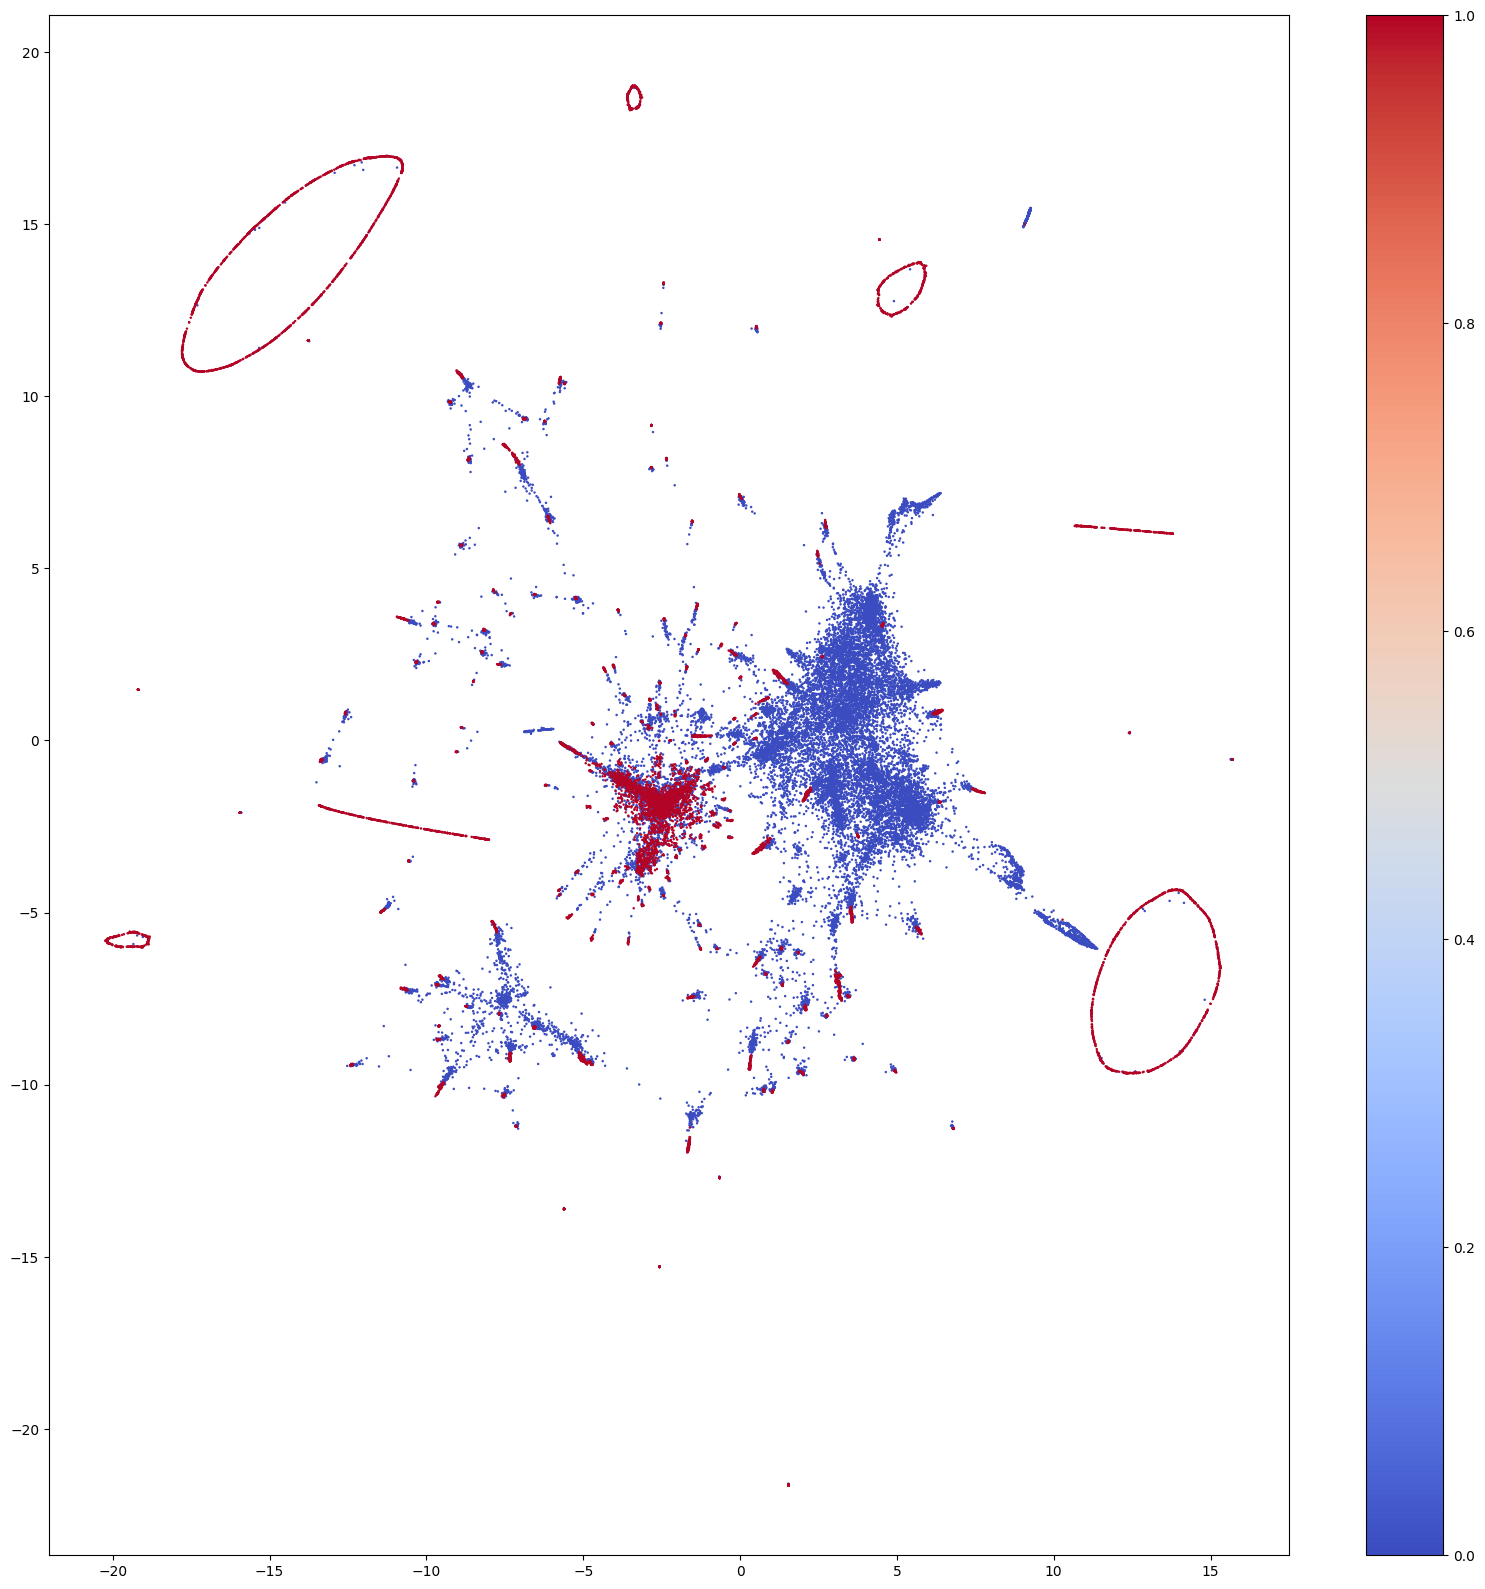

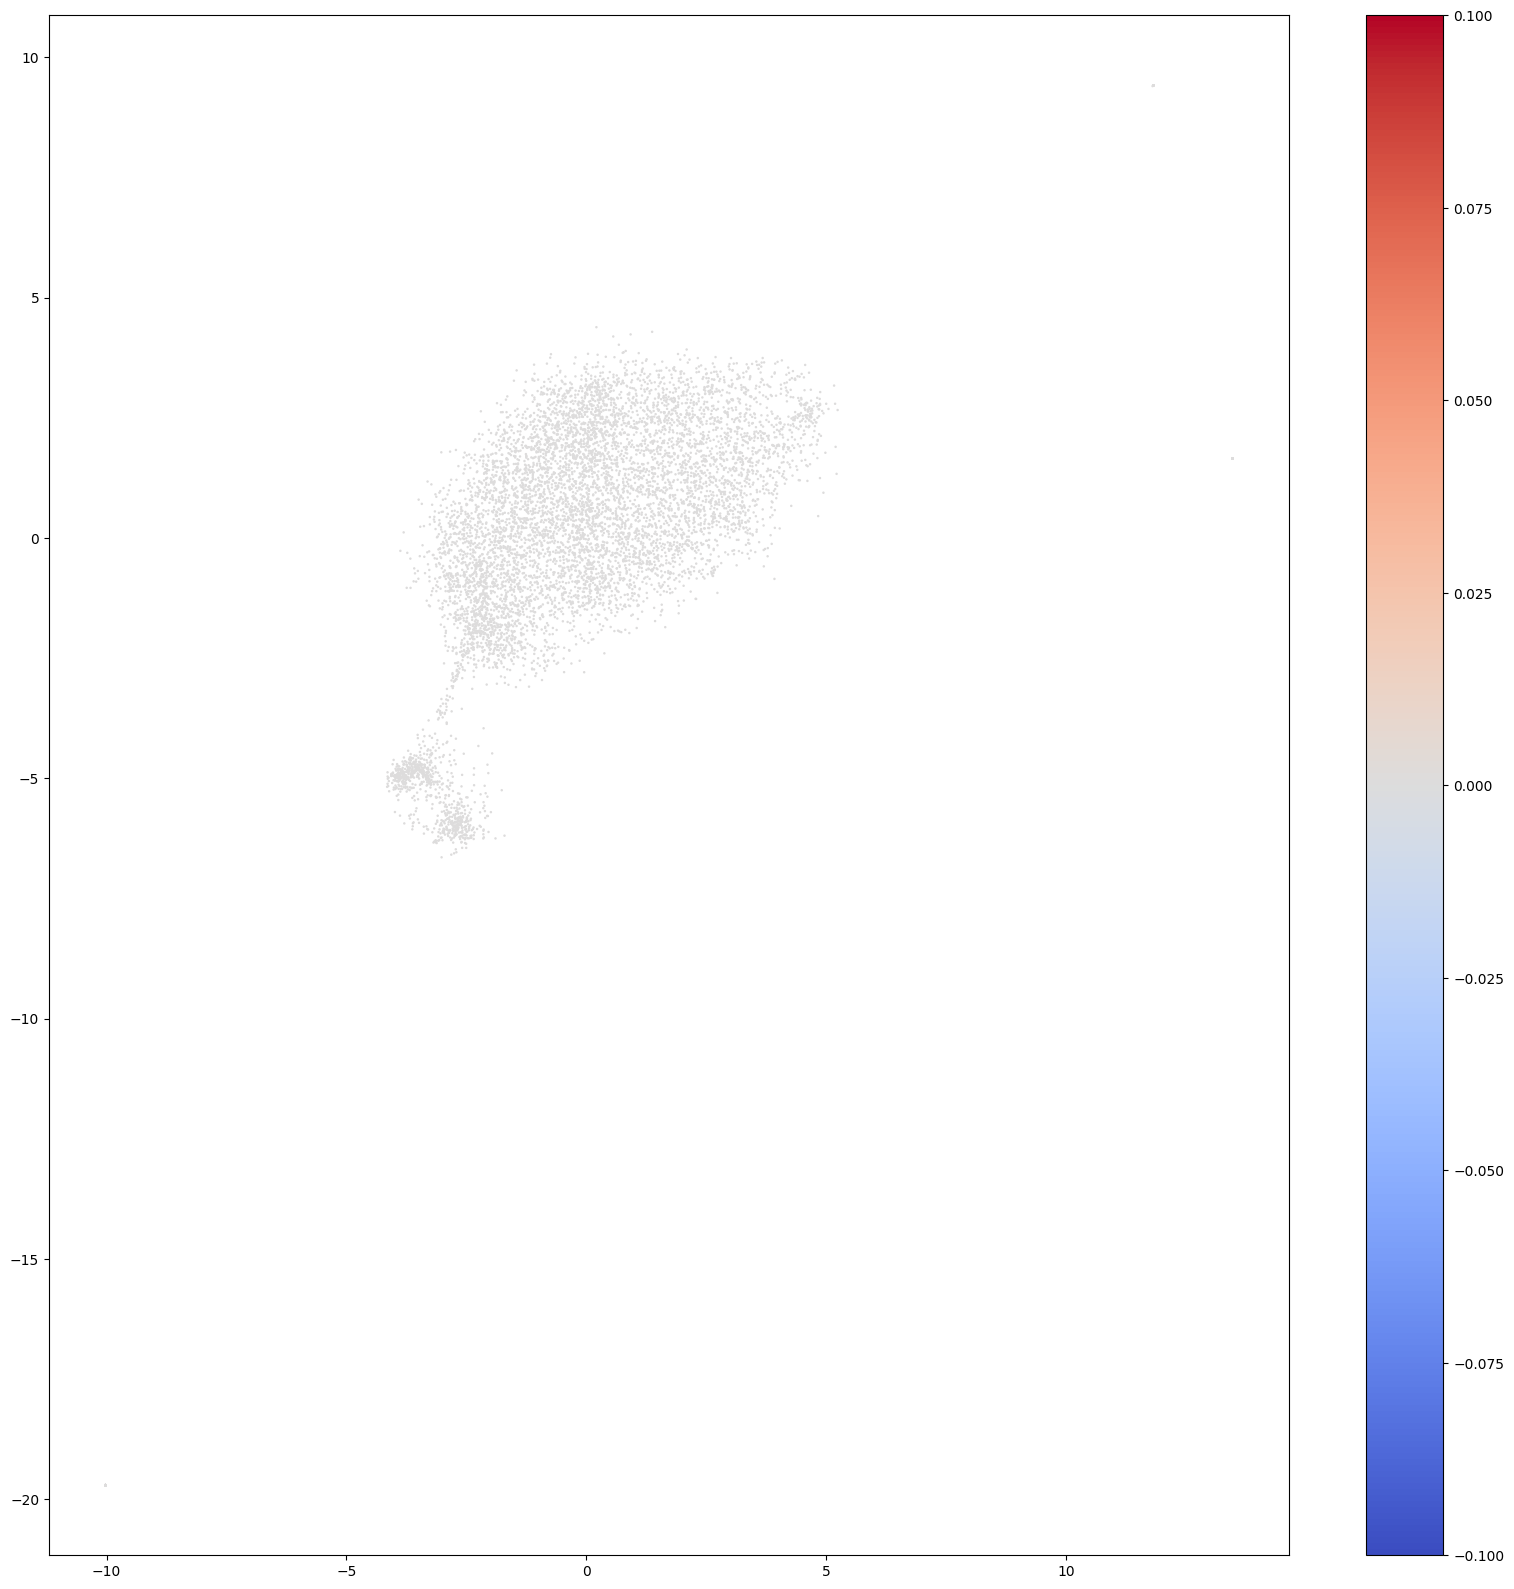

In [74]:
def label_function_address_count(labels, station_names): 
    for station_name in station_names:
            # Check if the station_name exists in address_coordinates dictionary
            if station_name in address_count_seq:
                if address_count_seq[station_name] == 1:
                    labels.append(address_count_seq[station_name])
                else: 
                 labels.append("")
            #     labels.append(address_count_seq[station_name])
            # else: 
            #     labels.append("")
    return labels

# create_plot(model_200, label_function_address_count, 'model_200_min_1_count')
create_plot(model_3000, label_function_address_count, 'model_3000_min_1_count')
create_plot(model_5000, label_function_address_count, 'model_5000_min_10_count')
#create_plot_3d(model_3000, label_function_address_count, 'model_3000_min_1_count_3d')
#create_plot_3d(model_5000, label_function_address_count, 'model_5000_min_1_count_added_3d')


# UMAP

In [1]:
%pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 3.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# Model exploration

In [11]:
predict_kbh = model_3000.predict_output_word(['København H'], 100000)
sorted_kbh = sorted(predict_kbh, key=lambda x: x[1], reverse=True)
sorted_kbh

[('Alliancevej', 0.0005538548),
 ('Thad Jones Vej', 0.00048845535),
 ('Teglholm Allé', 0.00047920816),
 ('Frederiks Brygge', 0.00047709062),
 ('Zoologisk Have', 0.00045961587),
 ('Scandiagade', 0.00042512993),
 ('H. C. Ørsted Værket', 0.00041386788),
 ('Bodenhoffs Plads', 0.00040873518),
 ('Ernie Wilkins Vej', 0.0003820767),
 ('Danhostel Copenhagen Bellahøj', 0.00037720348),
 ('Teglholmens Østkaj 59', 0.00037301745),
 ('Kanonbådsvej 1437 København K', 0.0003682964),
 ('Thoravej 10', 0.00036572551),
 ('Vasbygade', 0.00036114335),
 ('Sønderport', 0.0003609823),
 ('Halfdansgade', 0.00036069934),
 ('Tingvej 75', 0.0003589269),
 ('Skt. Annæ Gade', 0.00035447202),
 ('Teglholmsgade', 0.00035086702),
 ('Toldkammeret', 0.00034341062),
 ('Ved Volden 12', 0.00034295704),
 ('Drechselsgade', 0.00033731727),
 ('Tingvej', 0.00033695935),
 ('Teglholmens Østkaj 31', 0.00033510983),
 ('Nyhavnsbroen', 0.00032886802),
 ('Sankt Annæ Plads', 0.00032661294),
 ('Ruten 199', 0.00032567725),
 ('Amagerfælledvej'

In [62]:
sims = model_200.wv.most_similar('København H (Metro)', topn=20)  # get other similar words
sims1 = model_1000.wv.most_similar('København H (Metro)', topn=20)  # get other similar words
sims2 = model_3000.wv.most_similar('København H (Metro)', topn=20)  # get other similar words
for s in sims:
    print(s)

print()
for s in sims1:
    print(s)

print()
for s in sims2:
    print(s)


('Kvægtorvsgade 7', 0.4578242897987366)
('Klerkegade 25B', 0.4505002796649933)
('Lille Colbjørnsensgade 10', 0.43951085209846497)
('Kristianiagade', 0.43877866864204407)
('København H St. (Metro)', 0.43700316548347473)
('Fensmarkgade 53', 0.43620866537094116)
('Torvegade 58', 0.43102723360061646)
('Østergade 6', 0.4295163154602051)
('Landgreven 7', 0.42887890338897705)
('Italiensvej 74', 0.4281323254108429)
('Sølvgade 31', 0.4259320795536041)
('Blegdamsvej 116A', 0.42359426617622375)
('Badstuestræde 8A', 0.4231570363044739)
('Vestergade 28', 0.42126572132110596)
('Rådhusstræde 2', 0.4211588501930237)
('Vester Søgade 60', 0.4209226369857788)
('Åbenrå 35', 0.42032840847969055)
('Kronprinsessegade 19', 0.4200340211391449)
('Kristianiagade 2', 0.4193722903728485)
('Rømersgade 22D', 0.4181496500968933)

('Klerkegade 25B', 0.43646717071533203)
('Slagtehusgade 13C', 0.43538492918014526)
('Kvægtorvsgade 7', 0.4330595135688782)
('Venedigvej 13', 0.43286454677581787)
('Østergade 6', 0.4291731715

In [21]:
sims = model_3000.wv.most_similar('Vanløse St.', topn=20)  # get other similar words
sims

[('Flintholm St.', 0.42141199111938477),
 ('Himmerlandsvej 2720 Vanløse', 0.4204695522785187),
 ('Vanløse St. (Metro)', 0.4036458730697632),
 ('Valby St.', 0.3981545865535736),
 ('Roskildevej 144', 0.3972640037536621),
 ('Nørrebro St.', 0.396383672952652),
 ('Tagensvej 30', 0.38641712069511414),
 ('Husum St.', 0.38282740116119385),
 ('Hvalsøvej 13', 0.37859028577804565),
 ('Jorisvej 21A', 0.37828999757766724),
 ('Belfastvej 14', 0.3727234899997711),
 ('Luftmarinegade 50', 0.3717568516731262),
 ('Smallegade 28', 0.36957231163978577),
 ('Ingrid Marievej 66', 0.3695213198661804),
 ('Bavnevangen 13', 0.3688654601573944),
 ('Godthåbsvej 178', 0.3673308789730072),
 ('Bispevej 2400 København NV', 0.3670550286769867),
 ('Vesterled 16', 0.3668997883796692),
 ('Hedebygade 1754 København V', 0.3658467233181),
 ('Pelargonievej 14', 0.3656580150127411)]

In [39]:
for seq in sequences:
    for place in seq:
        if "Holcks Plads 18" in place:
            print(seq)

['Nørreport St.', 'Holcks Plads 18']
['Nørreport St.', 'Holcks Plads 18']
['Nørreport St.', 'Holcks Plads 18']
['Nørreport St.', 'Holcks Plads 18']
['Nørreport St.', 'Holcks Plads 18']
['Nørreport St.', 'Holcks Plads 18']
['Nørreport St.', 'Holcks Plads 18']
['Nørreport St.', 'Holcks Plads 18']
['Nørreport St.', 'Holcks Plads 18']
['Nørreport St.', 'Holcks Plads 18']


In [43]:
for seq in sequences:
    for place in seq:
        if "Finsensvej 12" in place:
            print(seq)

['København H (Metro)', 'Finsensvej 123']
['København H', 'Finsensvej 123']
['København H', 'Finsensvej 123']
['København H (Metro)', 'Finsensvej 123']
['Nørreport St.', 'Finsensvej 12']
['Nørreport St.', 'Finsensvej 12']
['Bülowsvej', 'Finsensvej 123']
['Nørreport St.', 'Finsensvej 12']
['København H', 'Finsensvej 123']
['Nørreport St.', 'Finsensvej 12']
['Nørreport St.', 'Finsensvej 12']
['Nørreport St.', 'Finsensvej 125']
['Nørreport St.', 'Finsensvej 12']
['Østerport St.', 'Finsensvej 125']
['Nørreport St.', 'Finsensvej 12']
['Nørreport St.', 'Finsensvej 12']
['København H', 'Finsensvej 123']
['Værnedamsvej', 'Finsensvej 123']
['København H', 'Finsensvej 123']
['Nørreport St.', 'Finsensvej 12']
['Nørreport St.', 'Finsensvej 12']
['København H', 'Finsensvej 123']
['Nørreport St.', 'Finsensvej 12']
['Vesterport St.', 'Finsensvej 128']
['Forum St.', 'Finsensvej 123']
['Nørreport St.', 'Finsensvej 12']
['Nørreport St.', 'Finsensvej 12']
['Nørreport St.', 'Finsensvej 12']
['Forum St.', 

In [55]:
for seq in sequences:
    for place in seq:
        if "Oceankaj 2" in place:
            print(seq)
    

['CPH Lufthavn', 'Oceankaj 2150 Nordhavn']
['Oceankaj 2150 Nordhavn', 'Gammel Strand St. (Metro)']
['CPH Lufthavn', 'Oceankaj 2']
['Oceankaj 2150 Nordhavn', 'Trianglen St. (Metro)']
['Oceankaj 2150 Nordhavn', 'Frederiksberg St. (Metro)']
['Rådhuspladsen St.', 'Oceankaj 2150 Nordhavn']
['Kongens Nytorv 13', 'Oceankaj 2150 Nordhavn']
['Oceankaj 2150 Nordhavn', 'Orientkaj St. (Metro)']
['Store Kongensgade', 'Oceankaj 2']
['CPH Lufthavn', 'Oceankaj 2']
['Oceankaj 2150 Nordhavn', 'Nørreport St.']
['Livjægergade 19', 'Oceankaj 2150 Nordhavn']
['Oceankaj 2150 Nordhavn', 'København H']
['Istanbulgade 2', 'Oceankaj 2150 Nordhavn']
['Gammel Strand St. (Metro)', 'Oceankaj 2150 Nordhavn']
['Oceankaj 2150 Nordhavn', 'Ørestad St. (Metro)']
['CPH Lufthavn', 'Oceankaj 2150 Nordhavn']
['Oceankaj 2150 Nordhavn', 'Tivoli Hotel']
['CPH Lufthavn', 'Oceankaj 2150 Nordhavn']
['Oceankaj 2150 Nordhavn', 'Marmorkirken St. (Metro)']
['CPH Lufthavn', 'Oceankaj 2']
['Oceankaj 2150 Nordhavn', 'Ørestad St. (Metro)']

# Emblaze


In [75]:
%pip install emblaze
%pip install --upgrade emblaze

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [76]:
import plotly.graph_objects as go
import plotly.io as pio

from emblaze import Emblaze
import numpy as np

# Assuming X is your data matrix with shape (n_samples, n_features)
# Replace this with your actual data
X = model.wv.vectors

# Initialize Emblaze with the desired number of dimensions
emb = Emblaze(n_components=3)  # Set n_components to the desired number of dimensions

# Fit Emblaze to your data
emb.fit(X)

# Transform your data to the reduced dimensionality
X_reduced = emb.transform(X)

# Optionally, you can also fit and transform in a single step
X_reduced = emb.fit_transform(X)

# Now you have the reduced-dimensional representation of your data in X_reduced
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    x=X_reduced[:, 0],
    y=X_reduced[:, 1],
    z=X_reduced[:, 2],
    mode='markers',
    marker=dict(
        size=4,
        color='blue',                # Set color to a variable if needed
        opacity=0.8
    )
)])
fig.update_layout(scene=dict(
    xaxis_title='Component 1',
    yaxis_title='Component 2',
    zaxis_title='Component 3'
))
fig.show()



ImportError: cannot import name 'Emblaze' from 'emblaze' (/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/emblaze/__init__.py)